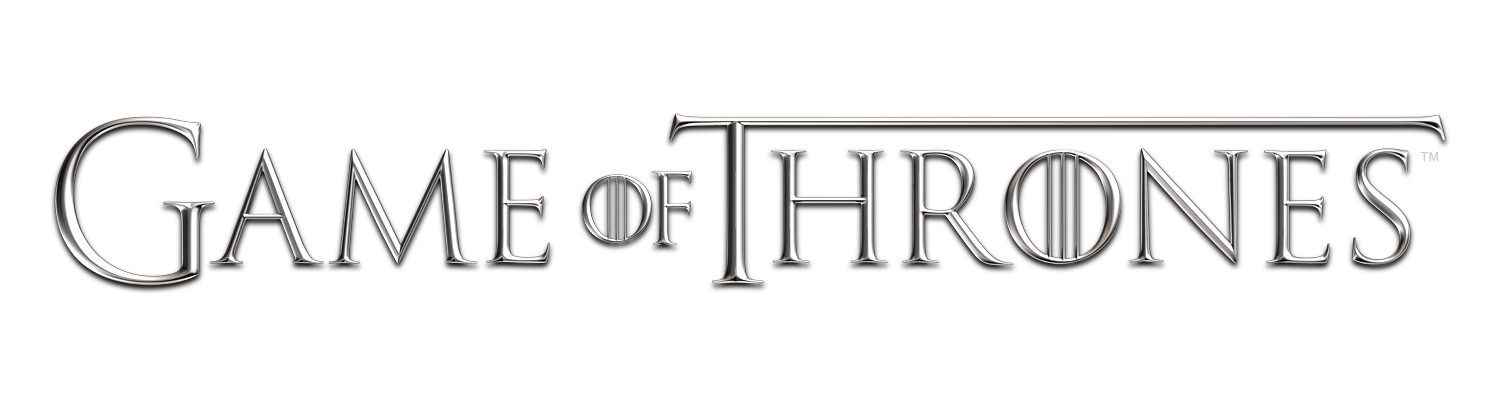

In [2]:
from IPython.display import Image
Image("Logo_Game_of_Thrones.png")

In [2]:
import numpy as np
import pandas as ps
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [4]:
df = ps.read_csv('character-deaths.csv')
df["Death Year"].fillna(0,inplace=True)
df["Is Alive?"]=Series([0 if i==0 else 1 for i in df["Death Year"]])
df=df.drop(['Book of Death','Death Chapter','Death Year'],axis=1)
df["Allegiances"]=Series(["Night's Watch" if i=="Night's Watch" else i.split()[-1] for i in df["Allegiances"]])
df=df.dropna()

df.head()

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
0,Addam Marbrand,Lannister,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,Targaryen,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,Greyjoy,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,21.0,1,1,1,0,1,1,0,1


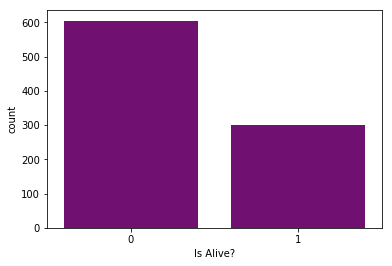

In [29]:
sum = sns.countplot(x="Is Alive?", data=df, color="purple")
# 1 = dead 
# 0 = alive

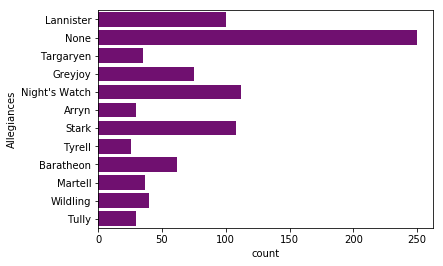

In [16]:
sum = sns.countplot(y="Allegiances", data=df, color="purple")

In [22]:
gb=df.groupby("Allegiances")
gb.mean()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
Allegiances,,,,,,,,,
Arryn,33.766667,0.800000,0.666667,0.600000,0.000000,0.233333,0.666667,0.000000,0.166667
Baratheon,19.580645,0.903226,0.725806,0.145161,0.774194,0.354839,0.064516,0.274194,0.387097
Greyjoy,24.000000,0.933333,0.493333,0.013333,0.373333,0.000000,0.613333,0.186667,0.293333
Lannister,30.590000,0.860000,0.650000,0.390000,0.620000,0.430000,0.490000,0.140000,0.300000
Martell,23.891892,0.621622,0.675676,0.000000,0.000000,0.405405,0.459459,0.567568,0.081081
Night's Watch,30.589286,1.000000,0.098214,0.321429,0.312500,0.687500,0.107143,0.366071,0.482143
None,30.764000,0.796000,0.360000,0.188000,0.232000,0.456000,0.228000,0.264000,0.296000
Stark,28.500000,0.750000,0.638889,0.574074,0.462963,0.287037,0.092593,0.277778,0.425926
Targaryen,28.228571,0.828571,0.285714,0.457143,0.314286,0.400000,0.000000,0.828571,0.228571


In [26]:
gbm=gb.mean()
print("**percent to live**")
print(100-gbm["Is Alive?"]*100)

**percent to live**
Allegiances
Arryn            83.333333
Baratheon        61.290323
Greyjoy          70.666667
Lannister        70.000000
Martell          91.891892
Night's Watch    51.785714
None             70.400000
Stark            57.407407
Targaryen        77.142857
Tully            70.000000
Tyrell           92.307692
Wildling         42.500000
Name: Is Alive?, dtype: float64


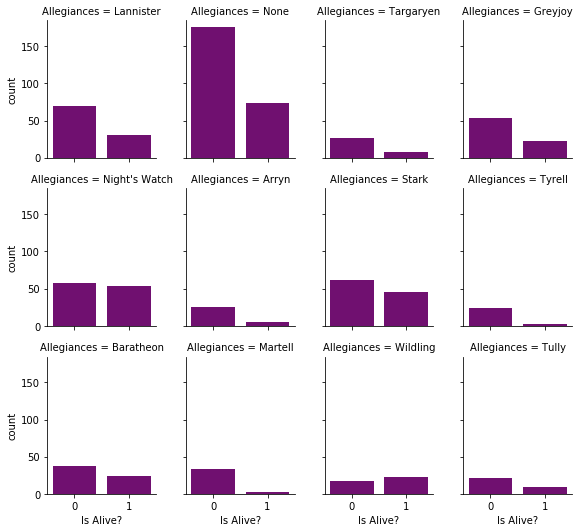

In [27]:
g = sns.catplot("Is Alive?", col_wrap=4,col="Allegiances",
               data=df, kind="count", height=2.5, aspect=.8,color="purple")

In [17]:
lb = LabelEncoder()
df["Allegiances"] = lb.fit_transform(df["Allegiances"])
df.head()

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
0,Addam Marbrand,3,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),6,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,8,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,2,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),5,21.0,1,1,1,0,1,1,0,1


In [18]:
X=df[["Allegiances","Book Intro Chapter","Gender","Nobility","GoT","CoK","SoS","FfC","DwD"]]
y=df["Is Alive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Logistic regression

In [19]:
logreg = LogisticRegression(solver="lbfgs",max_iter=1000,multi_class="multinomial",warm_start=True) 
logreg.fit(X_train, y_train)
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.6962393162393162


# SVC

Text(0, 0.5, 'Cross-Validated Accuracy')

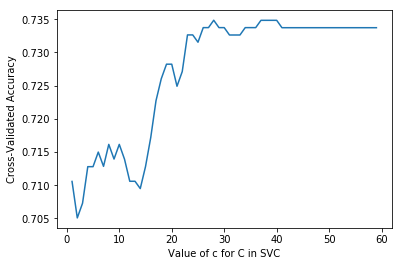

In [20]:
c_range = list(range(1,60))
c_scores = []
for c in c_range:
    svc = SVC(gamma="auto",C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())

plt.plot(c_range, c_scores)
plt.xlabel('Value of c for C in SVC')
plt.ylabel('Cross-Validated Accuracy')

In [22]:
svc = SVC(gamma="auto",C=40.0).fit(X_train,y_train)
svc.score(X_test,y_test)
print(cross_val_score(svc, X, y, cv=10, scoring='accuracy').mean())

0.7348351648351649


# KNN

Text(0, 0.5, 'Cross-Validated Accuracy')

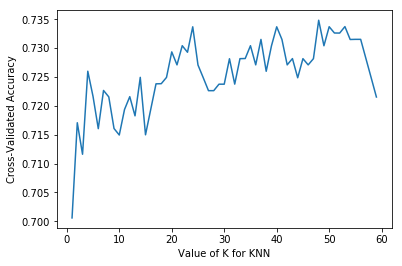

In [35]:
k_range = list(range(1, 60))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance",p=1)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [38]:
knn = KNeighborsClassifier(n_neighbors=48,weights="distance",p=1)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7348229548229549
